In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix


In [3]:
data=pd.read_csv('data.csv')


In [4]:
data

,self_employed,income_annum,loan_amount,loan_term,cibil_score,assets,loan_status
0,No,792834,830310,15,725,811436,Approved
1,No,432519,2194760,15,755,376960,Rejected
2,No,759679,1313560,10,794,1521240,Approved
3,No,738298,550330,10,800,1364044,Approved
4,No,686285,2779460,10,753,1692140,Rejected
...,...,...,...,...,...,...,...
14995,No,571371,2432920,10,735,1342496,Rejected
14996,Yes,701492,2548730,10,802,1440519,Rejected
14997,No,796934,1493670,20,745,683193,Approved
14998,No,896604,1154740,15,693,1708353,Rejected


In [5]:
data.describe()

,income_annum,loan_amount,loan_term,cibil_score,assets
count,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04
mean,7.491532e+05,2.007445e+06,14.070000,720.122067,9.986090e+05
std,2.003848e+05,7.508481e+05,3.753581,50.277336,4.008378e+05
min,-1.204250e+05,-1.058870e+06,10.000000,516.000000,-7.135590e+05
25%,6.159100e+05,1.504955e+06,10.000000,686.000000,7.289725e+05
50%,7.492190e+05,2.007825e+06,15.000000,720.000000,9.983020e+05
75%,8.841412e+05,2.516745e+06,15.000000,754.000000,1.263697e+06
max,1.591736e+06,5.663480e+06,20.000000,933.000000,2.536585e+06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   self_employed  15000 non-null  object
 1   income_annum   15000 non-null  int64 
 2   loan_amount    15000 non-null  int64 
 3   loan_term      15000 non-null  int64 
 4   cibil_score    15000 non-null  int64 
 5   assets         15000 non-null  int64 
 6   loan_status    15000 non-null  object
dtypes: int64(5), object(2)
memory usage: 820.4+ KB


In [7]:
data = data[(data['income_annum'] > 0) & (data['loan_amount'] > 0) & (data['assets'] > 0)]
data

,self_employed,income_annum,loan_amount,loan_term,cibil_score,assets,loan_status
0,No,792834,830310,15,725,811436,Approved
1,No,432519,2194760,15,755,376960,Rejected
2,No,759679,1313560,10,794,1521240,Approved
3,No,738298,550330,10,800,1364044,Approved
4,No,686285,2779460,10,753,1692140,Rejected
...,...,...,...,...,...,...,...
14995,No,571371,2432920,10,735,1342496,Rejected
14996,Yes,701492,2548730,10,802,1440519,Rejected
14997,No,796934,1493670,20,745,683193,Approved
14998,No,896604,1154740,15,693,1708353,Rejected


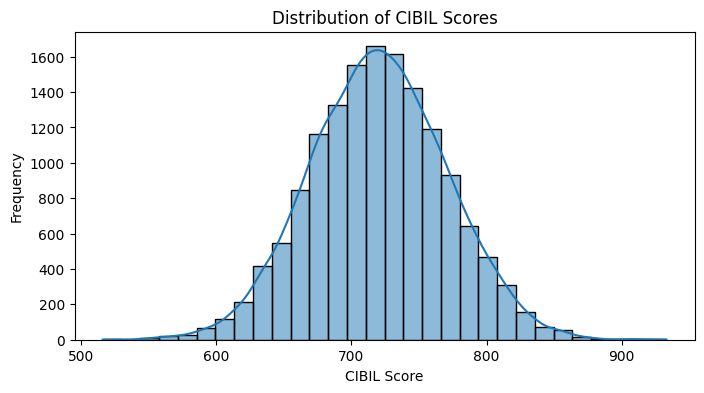

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(data['cibil_score'], kde=True, bins=30)
plt.title('Distribution of CIBIL Scores')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.show()

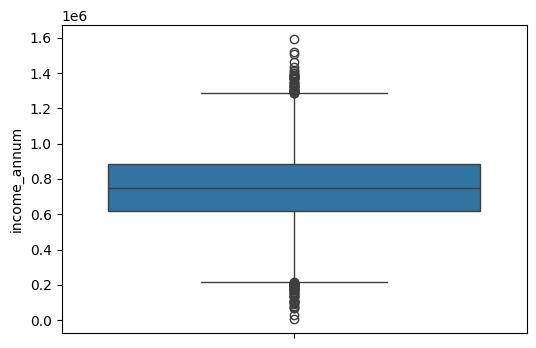

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data,y=data['income_annum'])
plt.show()

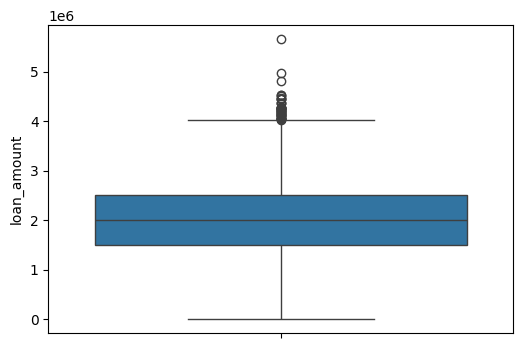

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data,y=data['loan_amount'])
plt.show()

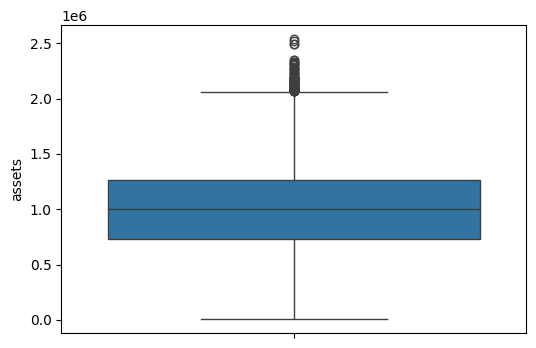

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data,y=data['assets'])
plt.show()

In [12]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns = ['income_annum', 'loan_amount', 'assets']
df = data.copy()

for column in columns:
    df = remove_outliers_iqr(df, column)

In [13]:
data=df

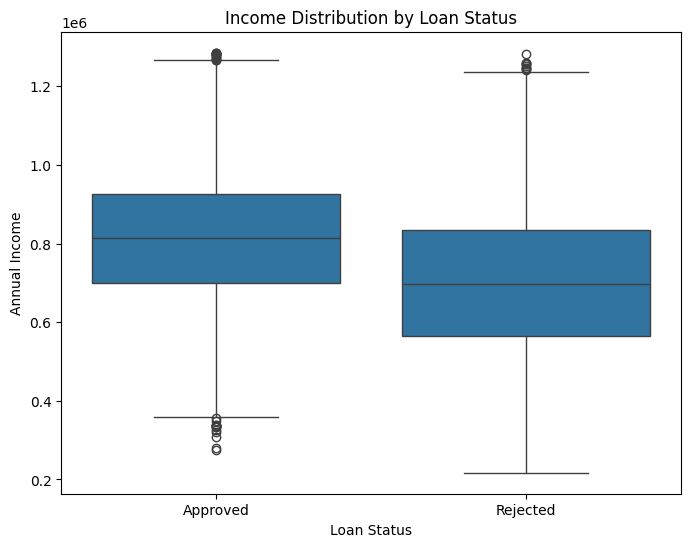

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='income_annum', data=data)
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

Text(0, 0.5, 'CIBIL Score')

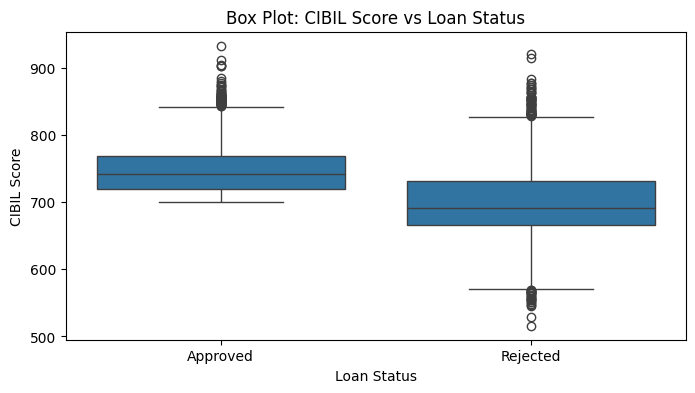

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x='loan_status', y='cibil_score', data=data)
plt.title('Box Plot: CIBIL Score vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')

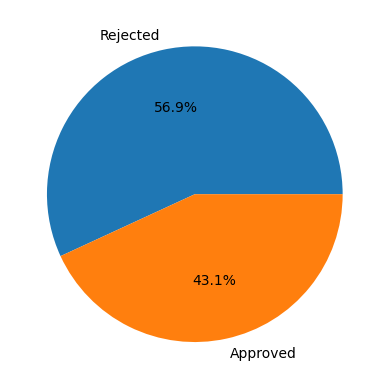

In [16]:
count = data['loan_status'].value_counts() 
plt.pie(count.values, 
        labels=count.index, 
        autopct='%1.1f%%') 
plt.show() 

In [29]:
label_encoder = LabelEncoder()
data['self_employed'] = label_encoder.fit_transform(data['self_employed'])
data['loan_status'] = data['loan_status'].replace(['Approved', 'Rejected'],[1, 0])

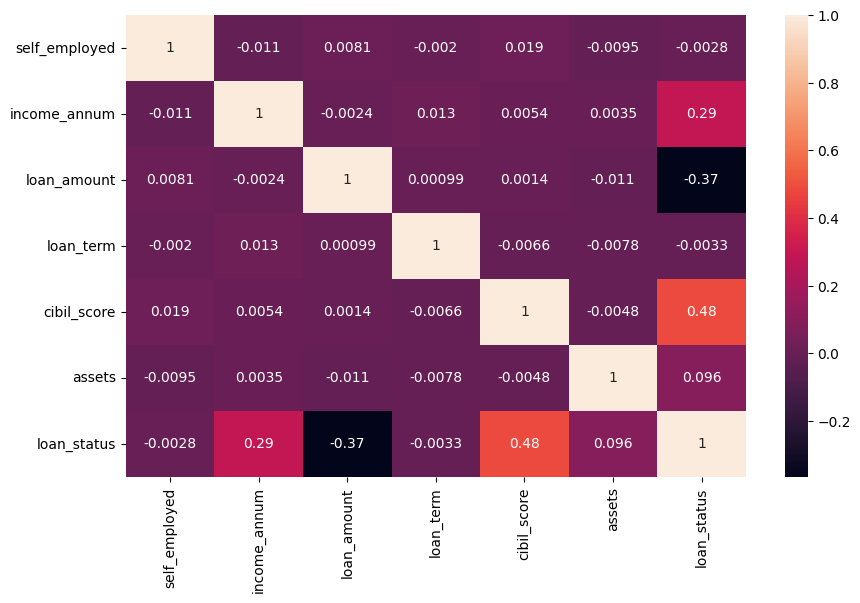

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14626 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   self_employed  14626 non-null  int64
 1   income_annum   14626 non-null  int64
 2   loan_amount    14626 non-null  int64
 3   loan_term      14626 non-null  int64
 4   cibil_score    14626 non-null  int64
 5   assets         14626 non-null  int64
 6   loan_status    14626 non-null  int64
dtypes: int64(7)
memory usage: 914.1 KB


In [20]:
data.head(5)

,self_employed,income_annum,loan_amount,loan_term,cibil_score,assets,loan_status
0,0,792834,830310,15,725,811436,1
1,0,432519,2194760,15,755,376960,0
2,0,759679,1313560,10,794,1521240,1
3,0,738298,550330,10,800,1364044,1
4,0,686285,2779460,10,753,1692140,0


In [21]:
# Split the dataset into features and target variable
X = data.iloc[:,:-1].values
y = data['loan_status'].values

In [22]:
y

array([1, 0, 1, ..., 1, 0, 0])

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = RandomForestClassifier(random_state=42,n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

accuracy, classification_report_str

(0.9945317840054683,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      1635\n           1       0.99      0.99      0.99      1291\n\n    accuracy                           0.99      2926\n   macro avg       0.99      0.99      0.99      2926\nweighted avg       0.99      0.99      0.99      2926\n')

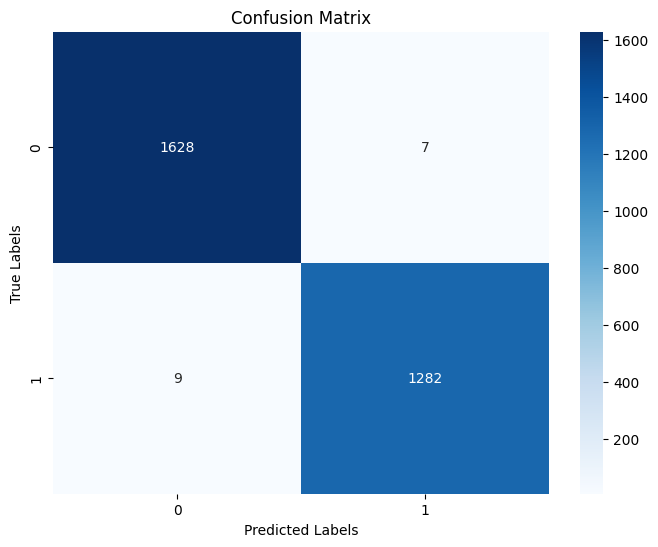

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
import pickle

In [28]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)